<img title="nome de Miguel e ano." alt="logo-miguel" src="./static/img/Logo.png">

# Student Mental Health

 The motivation is health analysis from students, to assistant in the handling e understanding these cases


## Modules Install

In [ ]:
!pip install pandas plotly seaborn scikit-learn numpy

## Modules Import

This code snippet imports various Python libraries for data analysis and visualization

In [1]:
import pandas as pd
from plotly import express as px
from plotly.subplots import make_subplots
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np

## Data Extract


This line of code reads a CSV file named 'StressLevelDataset.csv' from the './data/' directory and stores its contents in a pandas DataFrame object called `df_student`.

In [2]:
df_student = pd.read_csv('./data/StressLevelDataset.csv')

## Data Wrangling

In [3]:
df_student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   anxiety_level                 1100 non-null   int64
 1   self_esteem                   1100 non-null   int64
 2   mental_health_history         1100 non-null   int64
 3   depression                    1100 non-null   int64
 4   headache                      1100 non-null   int64
 5   blood_pressure                1100 non-null   int64
 6   sleep_quality                 1100 non-null   int64
 7   breathing_problem             1100 non-null   int64
 8   noise_level                   1100 non-null   int64
 9   living_conditions             1100 non-null   int64
 10  safety                        1100 non-null   int64
 11  basic_needs                   1100 non-null   int64
 12  academic_performance          1100 non-null   int64
 13  study_load                    110

In [3]:
df_student.head()

anxiety_level  self_esteem  mental_health_history  depression  headache  \
0             14           20                      0          11         2   
1             15            8                      1          15         5   
2             12           18                      1          14         2   
3             16           12                      1          15         4   
4             16           28                      0           7         2   

   blood_pressure  sleep_quality  breathing_problem  noise_level  \
0               1              2                  4            2   
1               3              1                  4            3   
2               1              2                  2            2   
3               3              1                  3            4   
4               3              5                  1            3   

   living_conditions  ...  basic_needs  academic_performance  study_load  \
0                  3  ...            2                     3           2   
1                  1  ...            2                     1           4   
2                  2  ...            2                     2           3   
3                  2  ...            2                     2           4   
4                  2  ...            3                     4           3   

   teacher_student_relationship  future_career_concerns  social_support  \
0                             3                       3               2   
1                             1                       5               1   
2                             3                       2               2   
3                             1                       4               1   
4                             1                       2               1   

   peer_pressure  extracurricular_activities  bullying  stress_level  
0              3                           3         2             1  
1              4                           5         5             2  
2              3                           2         2             1  
3              4                           4         5             2  
4              5                           0         5             1  

[5 rows x 21 columns]

## Data Cleaning

In [6]:
df_student.isna().sum()

anxiety_level                   0
self_esteem                     0
mental_health_history           0
depression                      0
headache                        0
blood_pressure                  0
sleep_quality                   0
breathing_problem               0
noise_level                     0
living_conditions               0
safety                          0
basic_needs                     0
academic_performance            0
study_load                      0
teacher_student_relationship    0
future_career_concerns          0
social_support                  0
peer_pressure                   0
extracurricular_activities      0
bullying                        0
stress_level                    0
dtype: int64

In [7]:
df_student.duplicated().sum()

0

## EDA

In [7]:
df_student.describe()

anxiety_level  self_esteem  mental_health_history   depression  \
count    1100.000000  1100.000000            1100.000000  1100.000000   
mean       11.063636    17.777273               0.492727    12.555455   
std         6.117558     8.944599               0.500175     7.727008   
min         0.000000     0.000000               0.000000     0.000000   
25%         6.000000    11.000000               0.000000     6.000000   
50%        11.000000    19.000000               0.000000    12.000000   
75%        16.000000    26.000000               1.000000    19.000000   
max        21.000000    30.000000               1.000000    27.000000   

          headache  blood_pressure  sleep_quality  breathing_problem  \
count  1100.000000     1100.000000    1100.000000        1100.000000   
mean      2.508182        2.181818       2.660000           2.753636   
std       1.409356        0.833575       1.548383           1.400713   
min       0.000000        1.000000       0.000000           0.000000   
25%       1.000000        1.000000       1.000000           2.000000   
50%       3.000000        2.000000       2.500000           3.000000   
75%       3.000000        3.000000       4.000000           4.000000   
max       5.000000        3.000000       5.000000           5.000000   

       noise_level  living_conditions  ...  basic_needs  academic_performance  \
count  1100.000000        1100.000000  ...  1100.000000           1100.000000   
mean      2.649091           2.518182  ...     2.772727              2.772727   
std       1.328127           1.119208  ...     1.433761              1.414594   
min       0.000000           0.000000  ...     0.000000              0.000000   
25%       2.000000           2.000000  ...     2.000000              2.000000   
50%       3.000000           2.000000  ...     3.000000              2.000000   
75%       3.000000           3.000000  ...     4.000000              4.000000   
max       5.000000           5.000000  ...     5.000000              5.000000   

        study_load  teacher_student_relationship  future_career_concerns  \
count  1100.000000                   1100.000000             1100.000000   
mean      2.621818                      2.648182                2.649091   
std       1.315781                      1.384579                1.529375   
min       0.000000                      0.000000                0.000000   
25%       2.000000                      2.000000                1.000000   
50%       2.000000                      2.000000                2.000000   
75%       3.000000                      4.000000                4.000000   
max       5.000000                      5.000000                5.000000   

       social_support  peer_pressure  extracurricular_activities     bullying  \
count     1100.000000    1100.000000                 1100.000000  1100.000000   
mean         1.881818       2.734545                    2.767273     2.617273   
std          1.047826       1.425265                    1.417562     1.530958   
min          0.000000       0.000000                    0.000000     0.000000   
25%          1.000000       2.000000                    2.000000     1.000000   
50%          2.000000       2.000000                    2.500000     3.000000   
75%          3.000000       4.000000                    4.000000     4.000000   
max          3.000000       5.000000                    5.000000     5.000000   

       stress_level  
count   1100.000000  
mean       0.996364  
std        0.821673  
min        0.000000  
25%        0.000000  
50%        1.000000  
75%        2.000000  
max        2.000000  

[8 rows x 21 columns]

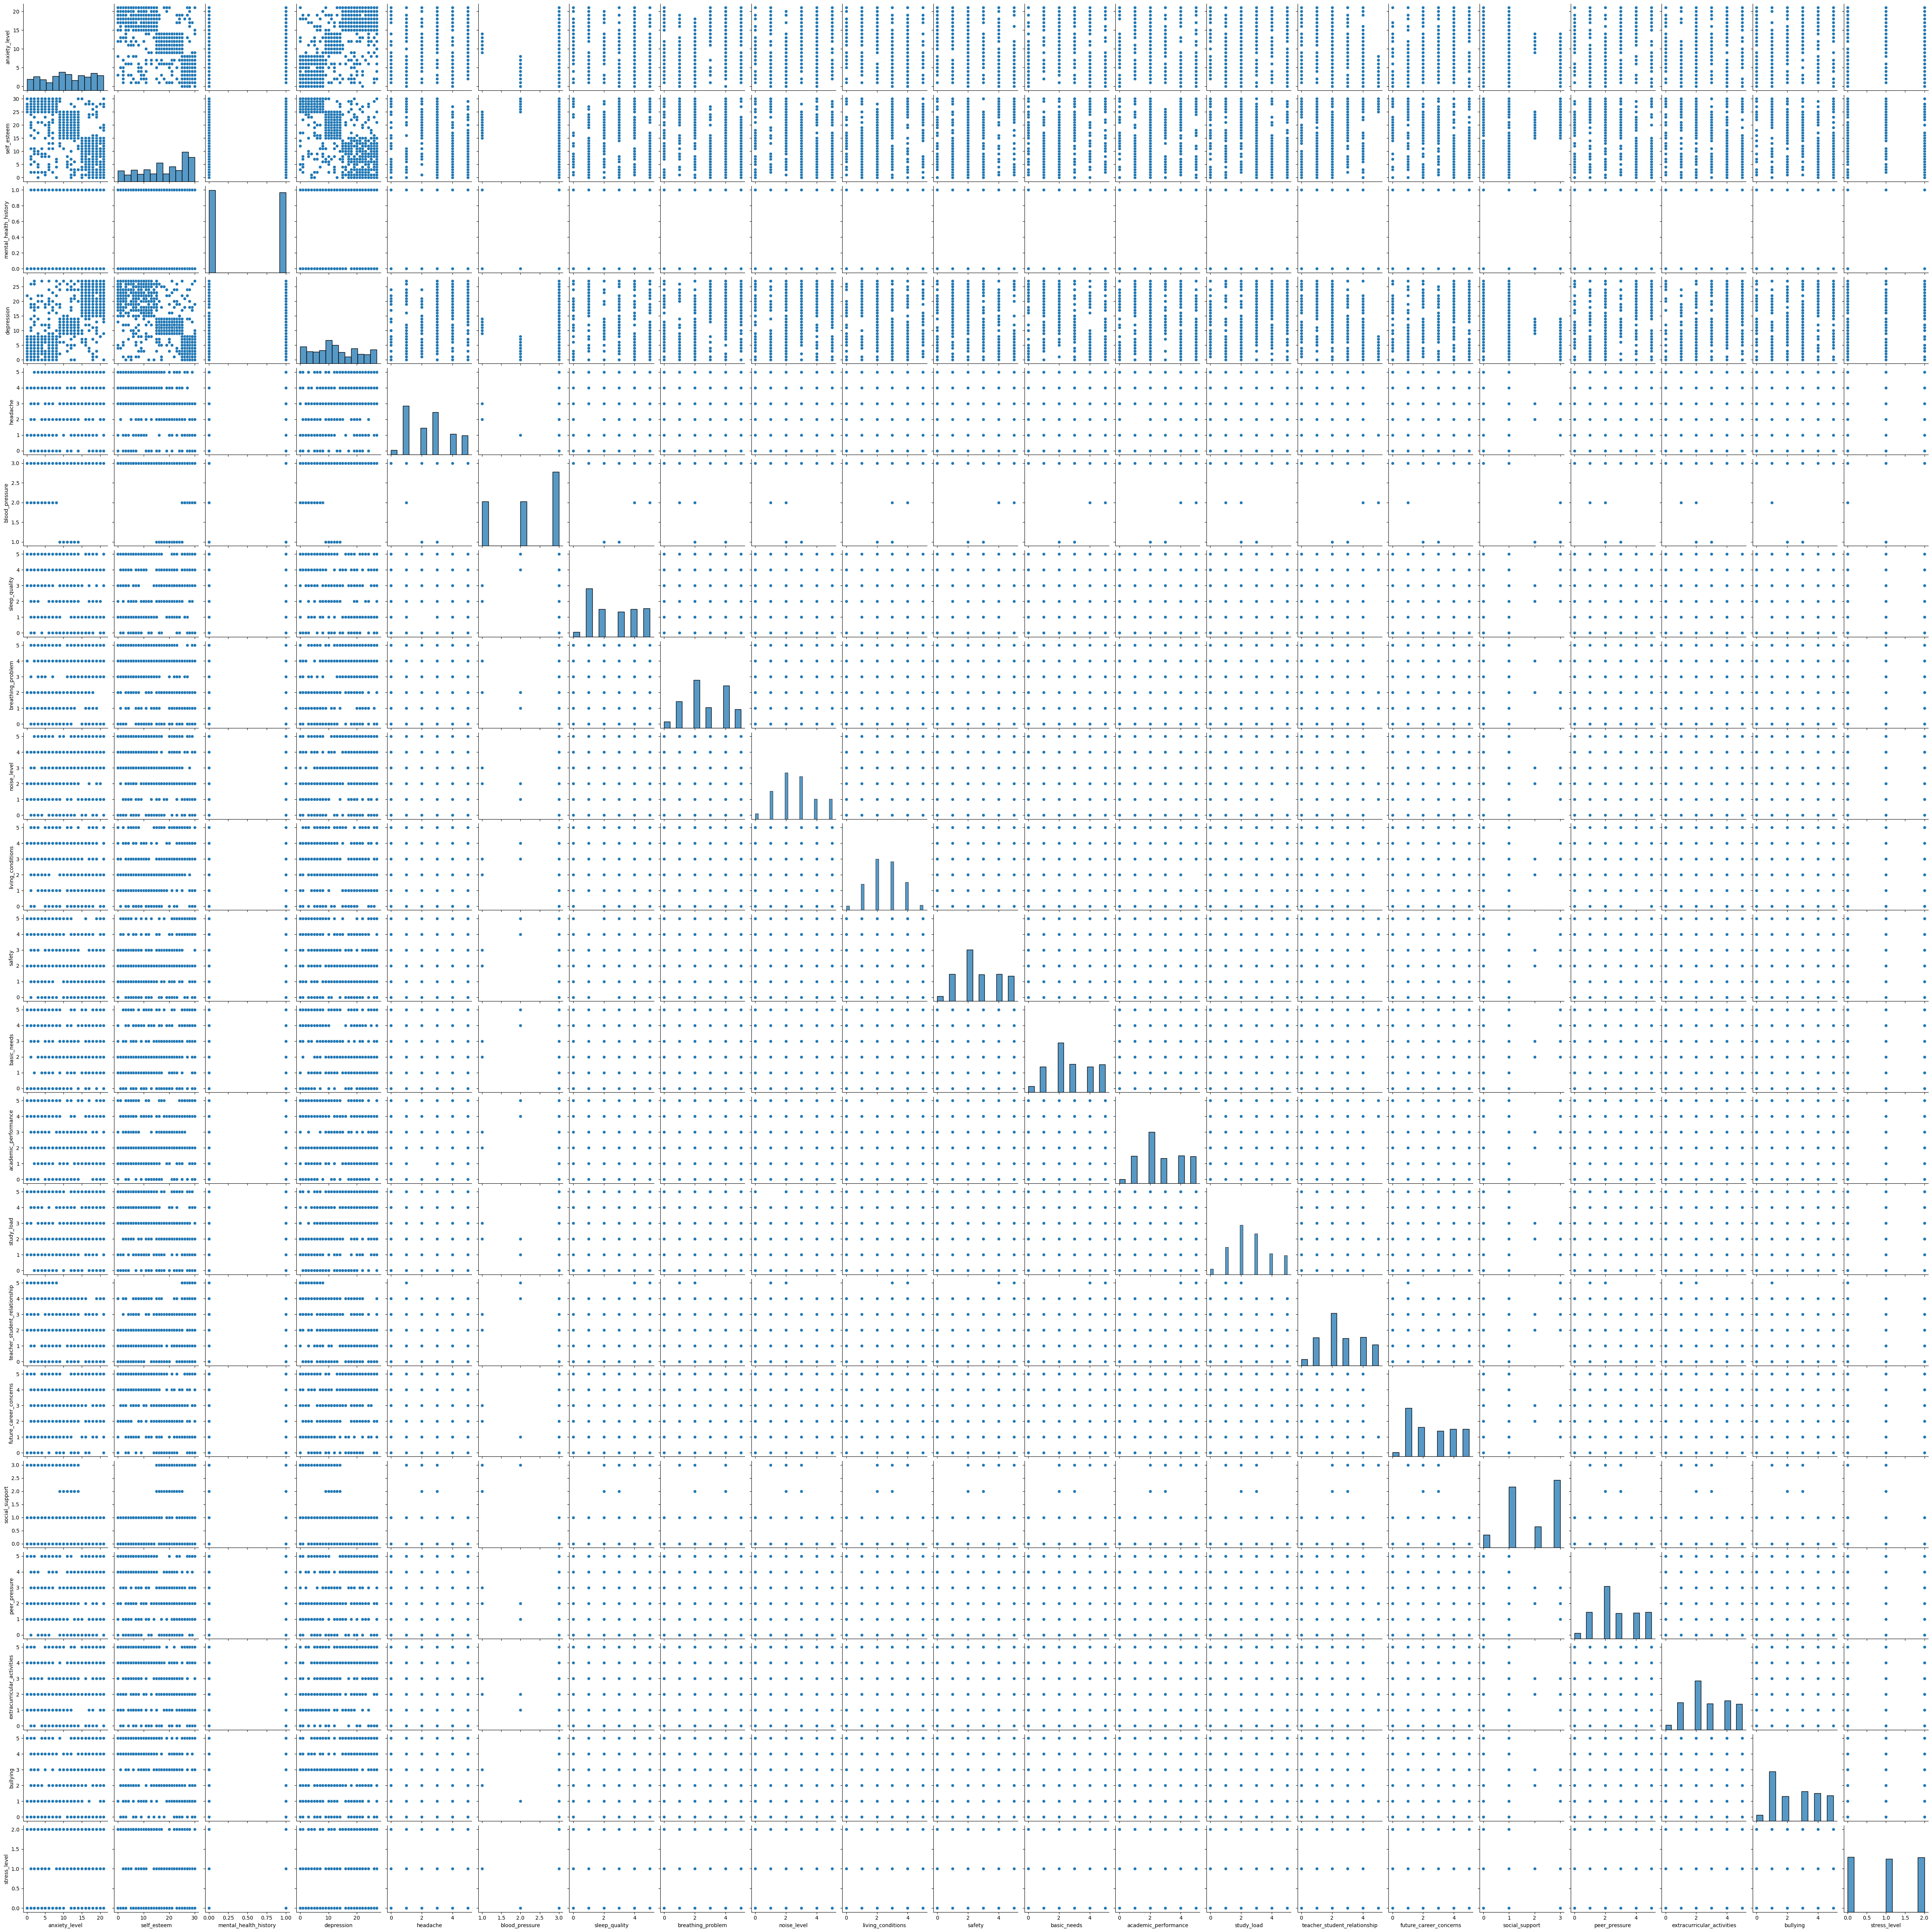

In [68]:
sns.pairplot(df_student)

 - There's difference between groups expicit at depression level, anxiety, self_esteem, would be three distincts (clusters).

## Model

### Evaluation

In [6]:
wcss = []

for k in range(1,11):
	model = KMeans(n_clusters=k,n_init="auto")
	model = model.fit(df_student[['self_esteem','anxiety_level','depression']])
	wcss.append(model.inertia_)

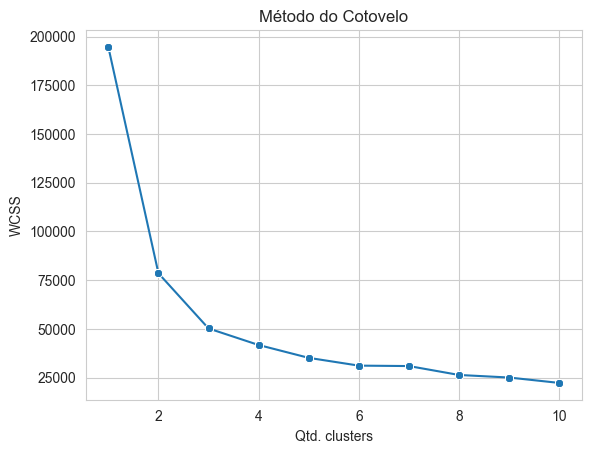

In [7]:
with sns.axes_style('whitegrid'): 
	grafico = sns.lineplot( x=range(1, 11), y=wcss,  marker="8") 
	grafico.set( title='Método do Cotovelo', ylabel='WCSS', xlabel='Qtd. clusters')
	

 - As mentioned and sed before the better option of clusters is three.

### Train

In [6]:
model = KMeans(n_clusters=3,n_init="auto")
model = model.fit(df_student)

In [7]:
model.__dict__

{'n_clusters': 3,
 'init': 'k-means++',
 'max_iter': 300,
 'tol': 0.0001,
 'n_init': 'auto',
 'verbose': 0,
 'random_state': None,
 'copy_x': True,
 'algorithm': 'lloyd',
 'feature_names_in_': array(['anxiety_level', 'self_esteem', 'mental_health_history',
        'depression', 'headache', 'blood_pressure', 'sleep_quality',
        'breathing_problem', 'noise_level', 'living_conditions', 'safety',
        'basic_needs', 'academic_performance', 'study_load',
        'teacher_student_relationship', 'future_career_concerns',
        'social_support', 'peer_pressure', 'extracurricular_activities',
        'bullying', 'stress_level'], dtype=object),
 'n_features_in_': 21,
 '_tol': 0.0009877847186147177,
 '_n_init': 1,
 '_algorithm': 'lloyd',
 '_n_threads': 2,
 'cluster_centers_': array([[4.25316456e+00, 2.73417722e+01, 1.58227848e-02, 4.06012658e+00,
         1.06645570e+00, 2.05063291e+00, 4.38924051e+00, 1.58227848e+00,
         1.55379747e+00, 3.48734177e+00, 4.38924051e+00, 4.38291139e+

In [8]:
df_student['cluster'] = model.labels_
df_student['cluster'] = df_student['cluster'].astype(str)

## Clusters Visualization

In [9]:
df_not_positive = df_student.groupby('cluster').agg({
        "anxiety_level":"median","depression":"median",
         "bullying":"median","noise_level":"median",
         "peer_pressure":"median",
         "stress_level":"median",
         "headache":"median"
        }
        ).reset_index()

df_positive = df_student.groupby('cluster').agg({
	"self_esteem":"median",
    "basic_needs":"median",
    "safety":"median",
    "sleep_quality":"median",
    "teacher_student_relationship":"median",
    "social_support":"median"
}).reset_index()

df_not_positive['amount'] = df_not_positive[df_not_positive.drop('cluster',axis=1).columns].sum(axis=1)

C:\Users\migue\AppData\Local\Programs\Python\Python312\Lib\site-packages\plotly\express\_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



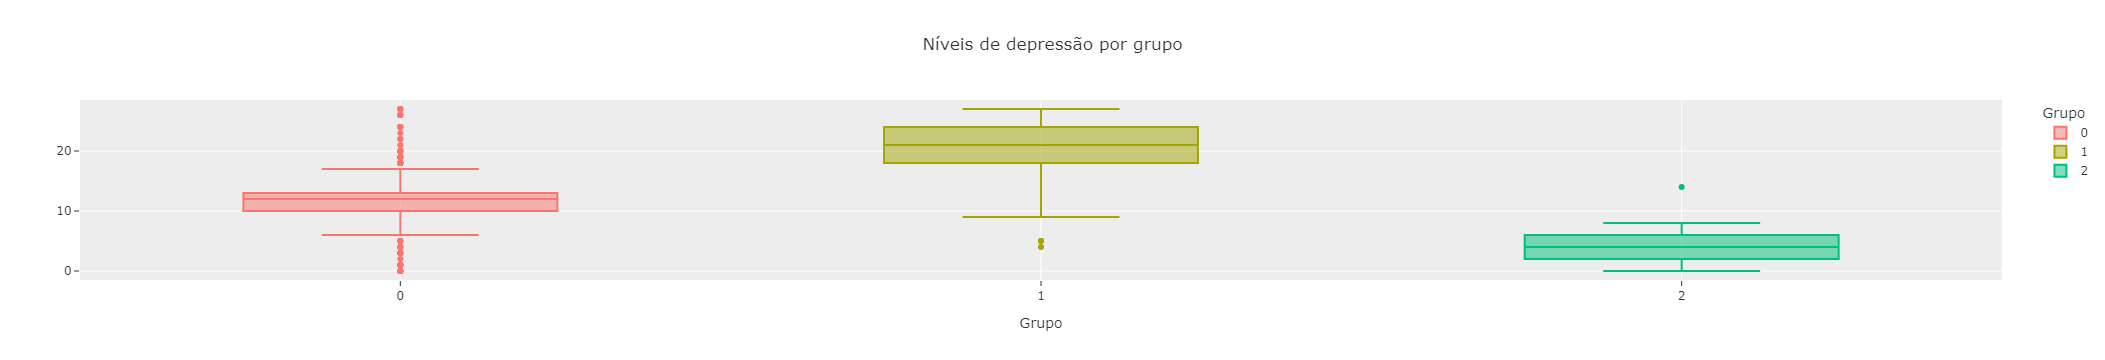

In [20]:
px.box(df_student,x='cluster',y='depression',color='cluster',template="ggplot2",labels={"cluster":"Grupo","depression":""},title="Níveis de depressão por grupo")

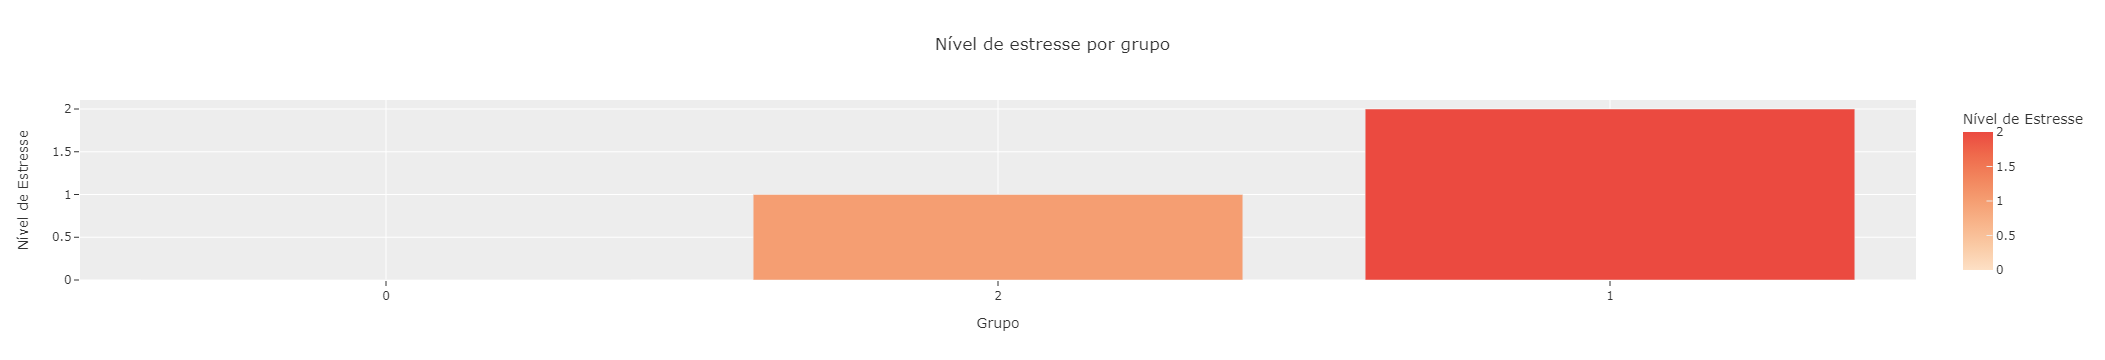

In [19]:
px.bar(df_student.groupby('cluster').agg({"stress_level":"median"}).reset_index().sort_values(by='stress_level',ascending=True),x='cluster',y='stress_level',color='stress_level',title="Nível de estresse por grupo",template='ggplot2',color_continuous_scale="peach", labels={"stress_level":"Nível de Estresse","cluster":"Grupo"})


C:\Users\migue\AppData\Local\Programs\Python\Python312\Lib\site-packages\plotly\express\_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



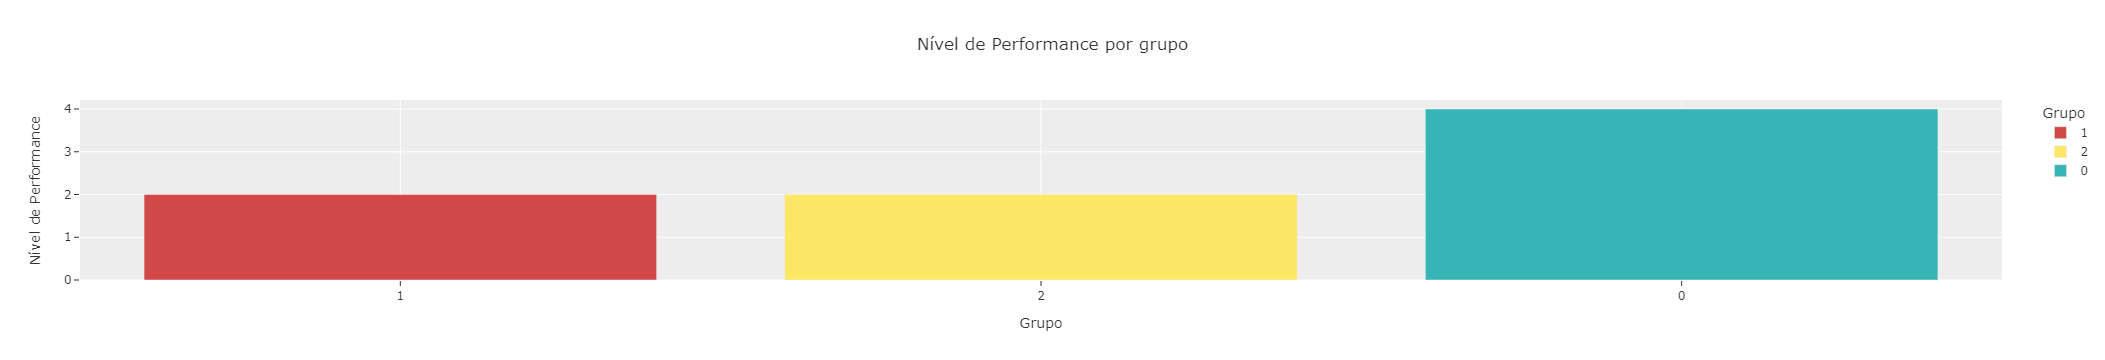

In [18]:
px.bar(df_student.groupby('cluster').agg({"academic_performance":"median"}).reset_index().sort_values(by='academic_performance',ascending=True),x='cluster',y='academic_performance',color='cluster',title='Nível de Performance por grupo',color_discrete_map={"0":"#37B5B6","2":"#FDE767","1":"#D04848"},labels={"academic_performance":"Nível de Performance","cluster":"Grupo"},template='ggplot2')

C:\Users\migue\AppData\Local\Programs\Python\Python312\Lib\site-packages\plotly\express\_core.py:2065: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  sf: grouped.get_group(s if len(s) > 1 else s[0])


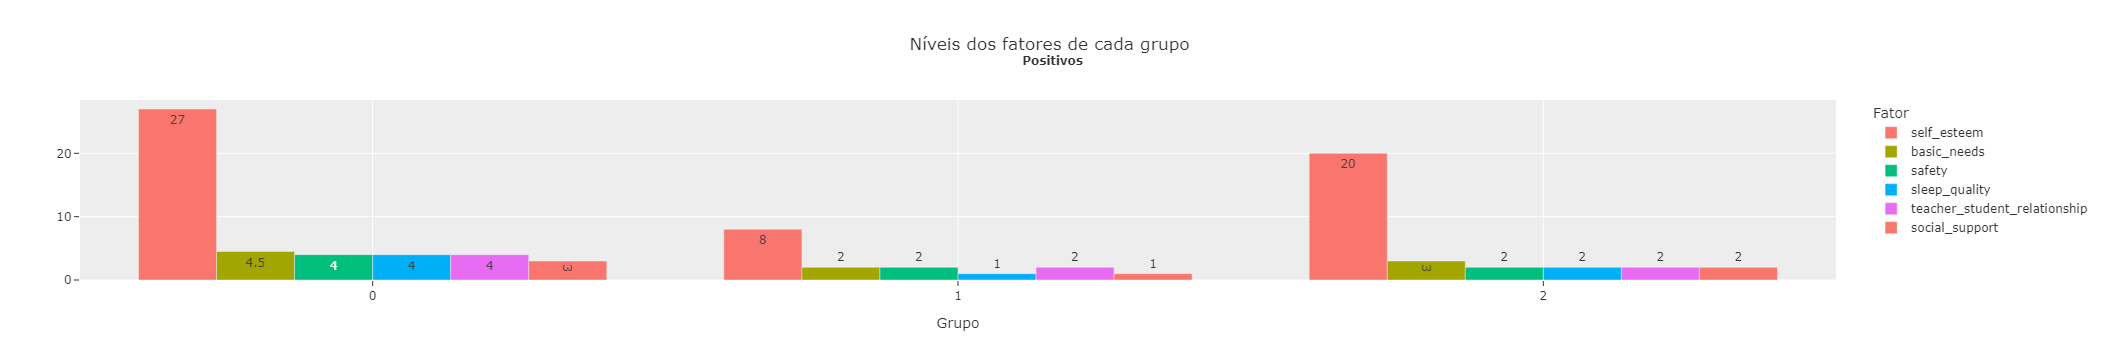

In [9]:
px.bar(df_positive,x="cluster",y=['self_esteem','basic_needs','safety','sleep_quality','teacher_student_relationship','social_support'],barmode='group',labels={"cluster":"Grupo","variable":"Fator"},title='Níveis dos fatores de cada grupo <br><sup><b>Positivos</b></sup>',template='ggplot2',text_auto=True).update_yaxes(title_text="")

C:\Users\migue\AppData\Local\Programs\Python\Python312\Lib\site-packages\plotly\express\_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



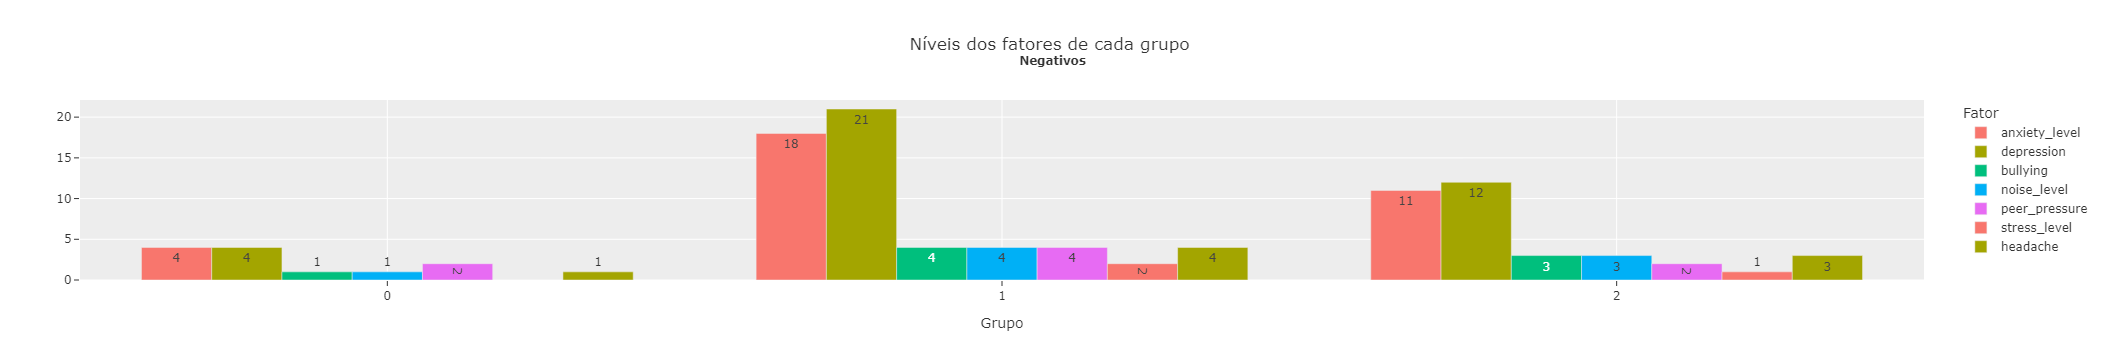

In [27]:
px.bar(df_not_positive,x="cluster",
	   y=['anxiety_level','depression','bullying','noise_level','peer_pressure','stress_level','headache'],
	   barmode='group',
	   labels={"cluster":"Grupo","variable":"Fator"},
	   title='Níveis dos fatores de cada grupo <br><sup><b>Negativos</b></sup>',
       text_auto=True,
       template='ggplot2').update_yaxes(title_text="")

C:\Users\migue\AppData\Local\Programs\Python\Python312\Lib\site-packages\plotly\express\_core.py:2065: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  sf: grouped.get_group(s if len(s) > 1 else s[0])


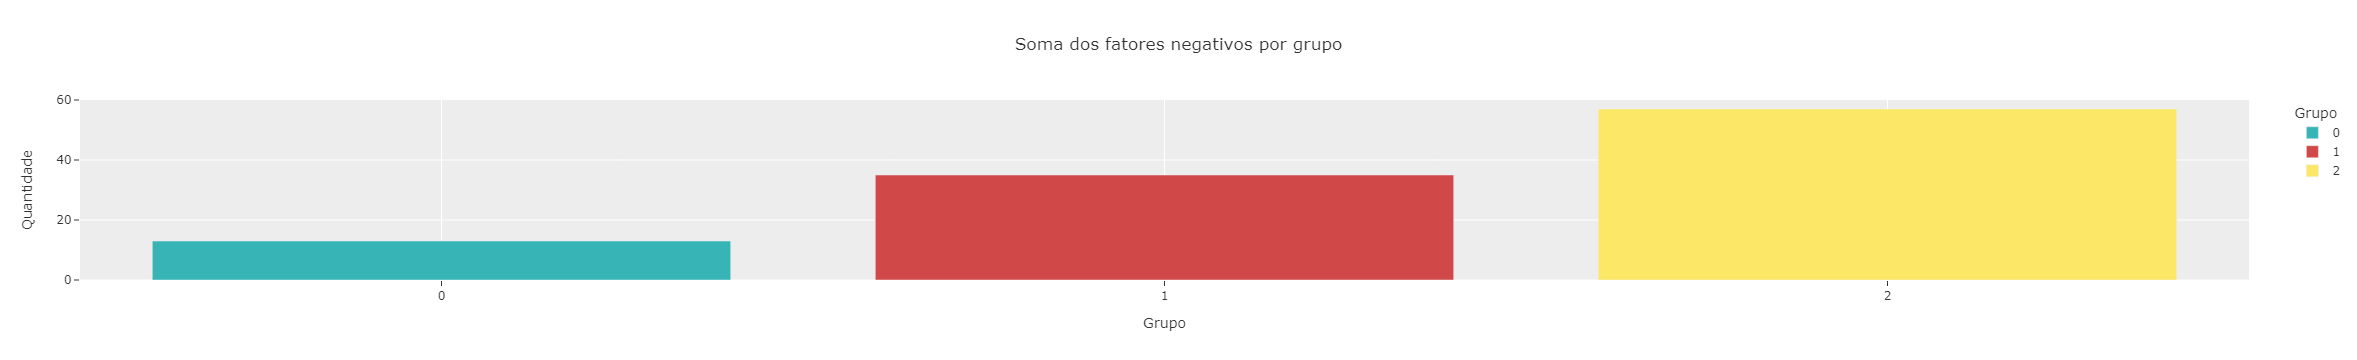

In [10]:
px.bar(df_not_positive.sort_values(by='amount',ascending=True),title="Soma dos fatores negativos por grupo",x='cluster',y='amount',color_discrete_map={"0":"#37B5B6","2":"#FDE767","1":"#D04848"},color='cluster',template='ggplot2',labels={"amount":"Quantidade","cluster":"Grupo"})

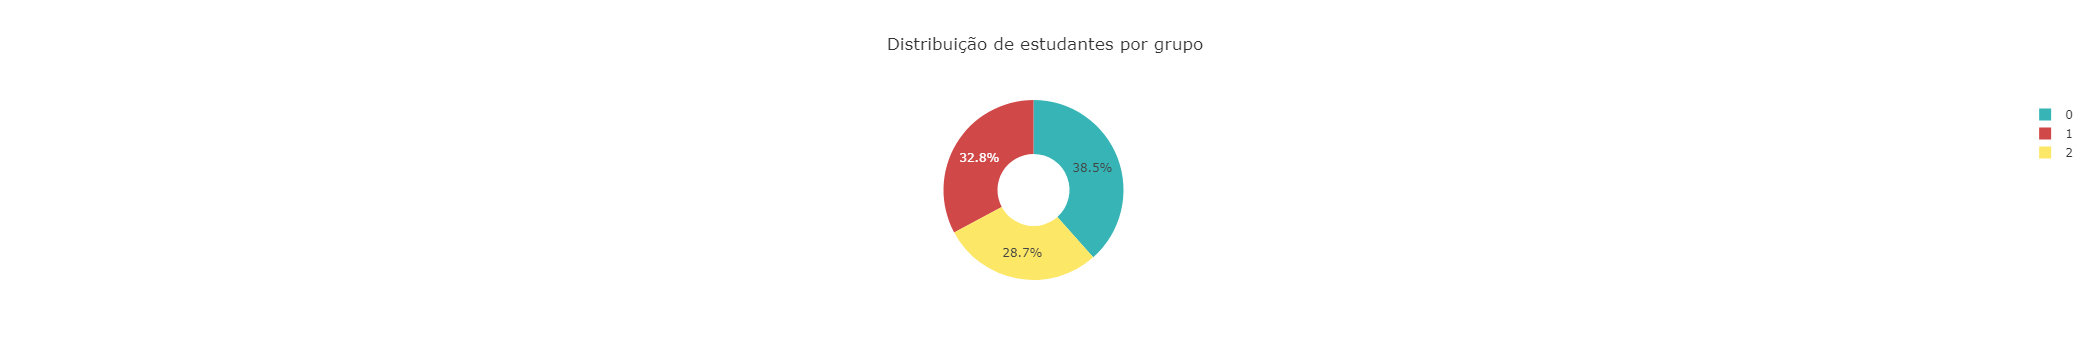

In [21]:
px.pie(df_student.groupby('cluster').agg({"cluster":"count"}).rename(columns={"cluster":"Quantidade"}).reset_index(),names='cluster',values='Quantidade',color='cluster',title='Distribuição de estudantes por grupo ',template='ggplot2',hole=0.4,color_discrete_map={"0":"#37B5B6","2":"#FDE767","1":"#D04848"},labels={"cluster":"Grupo"})